# Exercícios Fim de Ciclo

## 1- Importe os dados na sua ferramenta de preferência e calcule e utilize a média e mediana para todas as variáveis pertinentes, para responder às perguntas da CEO:

In [1]:
import pandas as pd
orders = pd.read_csv('../datasets/orders.csv')
reviews = pd.read_csv('../datasets/order_reviews.csv')
sellers = pd.read_csv('../datasets/sellers.csv')
order_items = pd.read_csv('../datasets/order_items.csv')

### Quantos meses abrangem o histórico de vendas?

In [8]:
# Converte a coluna order_approved_at para datetime
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
# Cria coluna com apenas o mes e o ano 
orders['periodo'] = orders['order_approved_at'].dt.to_period('M')
# Conta o número de períodos únicos
orders['periodo'].dropna()
orders['periodo'].nunique()


24

### Qual o nível de vendas nos últimos 6 meses?


In [9]:
meses = orders['periodo'].sort_values(ascending=False).unique()
list_mes = meses.astype(str)
pedidos = 0
for mes in range(6):
    qt = orders[orders['periodo'] == list_mes[mes]]['order_id'].nunique()
    pedidos += qt
print(f'Quantidade de pedidos: {pedidos}')

Quantidade de pedidos: 32805


### Quantos clientes temos tido nos últimos 6 meses?

In [10]:
clientes = 0
for mes in range(6):
    qt = orders[orders['periodo'] == list_mes[mes]]['customer_id'].nunique()
    clientes += qt
print(f'Quantidade de clientes nos últimos 6 meses: {clientes}')

Quantidade de clientes nos últimos 6 meses: 32805


### Qual a avaliação que temos dos clientes?

In [11]:
rank_reviews = reviews['review_score'].value_counts().sort_index()
rank_reviews

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

### Quantos vendedores tem vendido pela nossa plataforma nos últimos 6 meses?

In [12]:
merged_df = pd.merge(orders, order_items, on='order_id', how='inner')
merged_df['order_approved_at'] = pd.to_datetime(merged_df['order_approved_at'])
merged_df['periodo'] = merged_df['order_approved_at'].dt.to_period('M')
meses = merged_df['periodo'].sort_values(ascending=False).unique()
list_mes = meses.astype(str)



In [13]:
vendedores = 0
for mes in range(6):
    qt = merged_df[merged_df['periodo'] == list_mes[mes]]['seller_id'].nunique()
    vendedores += qt
print(f'Quantidade de vendedores nos ultimos 6 meses: {vendedores}')

Quantidade de vendedores nos ultimos 6 meses: 5952


# 2 - Medidas de Posição de Erros de Modelos.

## Considerando…
- As medidas de posição estudadas e
- O conjunto de dados reais e 2 modelos que estimam este dado real:

In [14]:
import pandas as pd

# Dados fornecidos
data = {
    'Dado Real': [1.692, 2.933, 3.343, 4.069, 5.946, 6.244, 7.249, 8.792, 9.111, 10.849, 11.833, 12.376, 13.555, 14.423, 15.148, 16.811, 17.537, 18.583, 19.385, 20.102, 21.526, 22.810,
                  23.326, 24.898, 25.820, 26.589, 27.152, 28.705, 29.613, 30.390, 31.104, 32.730, 33.481, 34.011, 35.287, 36.952, 37.507, 38.550, 39.113, 40.065],
    'Modelo 1': [5.039, 5.466, 6.514, 6.034, 8.419, 8.122, 10.374, 11.396, 12.167, 13.425, 15.250, 15.188, 16.833, 16.211, 18.222, 19.406, 20.805, 21.291, 21.577, 22.051, 23.788, 24.405,
                 25.489, 26.449, 29.231, 29.295, 30.228, 30.353, 32.920, 33.195, 34.155, 35.365, 35.722, 37.005, 38.430, 39.476, 39.760, 40.275, 42.170, 42.033],
    'Modelo 2': [8.270, -5.929, 6.598, 3.418, 14.936, 3.929, 9.620, 1.267, 10.166, 2.782, 19.751, 8.802, 18.830, 10.406, 16.557, 9.106, 22.635, 13.047, 23.038, 19.136, 26.519, 15.113,
                 26.422, 16.370, 33.615, 20.990, 28.595, 22.005, 35.437, 26.685, 32.088, 25.796, 38.055, 33.909, 38.012, 27.912, 42.320, 33.324, 40.187, 39.446]
}

# Criar o DataFrame
df = pd.DataFrame(data)

# Visualizar o DataFrame
print(df)


    Dado Real  Modelo 1  Modelo 2
0       1.692     5.039     8.270
1       2.933     5.466    -5.929
2       3.343     6.514     6.598
3       4.069     6.034     3.418
4       5.946     8.419    14.936
5       6.244     8.122     3.929
6       7.249    10.374     9.620
7       8.792    11.396     1.267
8       9.111    12.167    10.166
9      10.849    13.425     2.782
10     11.833    15.250    19.751
11     12.376    15.188     8.802
12     13.555    16.833    18.830
13     14.423    16.211    10.406
14     15.148    18.222    16.557
15     16.811    19.406     9.106
16     17.537    20.805    22.635
17     18.583    21.291    13.047
18     19.385    21.577    23.038
19     20.102    22.051    19.136
20     21.526    23.788    26.519
21     22.810    24.405    15.113
22     23.326    25.489    26.422
23     24.898    26.449    16.370
24     25.820    29.231    33.615
25     26.589    29.295    20.990
26     27.152    30.228    28.595
27     28.705    30.353    22.005
28     29.613 

## Diga qual destes é o melhor modelo. Justifique!

In [15]:
df.describe()

,Dado Real,Modelo 1,Modelo 2
count,40.000000,40.000000,40.000000
mean,20.990250,23.588350,20.479125
std,11.644542,11.576094,12.425490
min,1.692000,5.039000,-5.929000
25%,11.587000,14.747250,10.029500
50%,20.814000,22.919500,20.370500
75%,30.568500,33.435000,29.468250
max,40.065000,42.170000,42.320000


### Resposta: O Modelo 2 possui uma média mais próxima da média dos dados Reais porém os outros valores do Modelo 1 se aproximam mais dos reais. Portanto o modelo 1 é ligeiramente melhor

# Utilizando a métrica R QUADRADO

In [16]:
y_media = df['Dado Real'].mean()
y_media

np.float64(20.990249999999996)

In [17]:
def ssr(previsao):
    soma = 0
    for i in previsao:
        resultado = (i - y_media)**2
        soma += resultado

    return soma

def sse(previsao, observado):
    soma = 0
    for i in range(len(previsao)):
        resultado = (observado[i] - previsao[i])**2
        soma += resultado
    return soma

def ssto(observado):
    soma = 0
    for i in observado:
        resultado = (i - y_media)**2
        soma += resultado
    return soma

def r_sqr(sse, ssto):
    resultado = 1 - (sse/ssto)
    return resultado

In [18]:
mod1_ssr = ssr(df['Modelo 1'])
mod1_sse = sse(df['Modelo 1'], df['Dado Real'])

mod2_ssr = ssr(df['Modelo 2'])
mod2_sse = sse(df['Modelo 2'], df['Dado Real'])

ssto = ssto(df['Dado Real'])

mod1_rquadrado = r_sqr(mod1_sse, ssto)
mod2_rquadrado = r_sqr(mod2_sse, ssto)

In [19]:
print(30*'-=')
print(f'Modelo 1\nR Quadrado: {mod1_rquadrado}\nTendo:\nSSE: {mod1_sse}\nSSR: {mod1_ssr}')
print(30*'-=')
print(f'Modelo 2\nR Quadrado: {mod2_rquadrado}\nTendo:\nSSE: {mod2_sse}\nSSR: {mod2_ssr}')
print(30*'-=')
print(f'SSTO: {ssto}')

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Modelo 1
R Quadrado: 0.9465858949898526
Tendo:
SSE: 282.46547000000015
SSR: 5496.237349500001
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Modelo 2
R Quadrado: 0.7799840856223118
Tendo:
SSE: 1163.4922769999996
SSR: 6031.7689930000015
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
SSTO: 5288.218719499999


# Resposta: Com base no cálculo do R Quadrado podemos concluir que o Modelo 1 é melhor que o Modelo dois pois o resultado está mais próximo de 1, o que significa que a variação total nos dados é melhor explicada pelo modelo 1

# SOLUÇÃO

In [20]:
import pandas as pd
from matplotlib import pyplot as plt

In [21]:
df = pd.read_csv('../datasets/modelos.csv')
df = df[['Dado Real', 'Modelo 1', 'Modelo 2']]

In [22]:
df['Erro 1'] = df['Dado Real'] - df['Modelo 1']
df['Erro 2'] = df['Dado Real'] - df['Modelo 2']

In [23]:
df.head()

,Dado Real,Modelo 1,Modelo 2,Erro 1,Erro 2
0,1.692,5.039,8.270,-3.347,-6.578
1,2.933,5.466,-5.929,-2.533,8.862
2,3.343,6.514,6.598,-3.171,-3.255
3,4.069,6.034,3.418,-1.965,0.651
4,5.946,8.419,14.936,-2.473,-8.990


In [24]:
contagem = len(df)


In [25]:
stats = df.describe()
stats

,Dado Real,Modelo 1,Modelo 2,Erro 1,Erro 2
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.990250,23.588350,20.479125,-2.598100,0.511125
std,11.644542,11.576094,12.425490,0.565244,5.437388
min,1.692000,5.039000,-5.929000,-3.417000,-8.990000
25%,11.587000,14.747250,10.029500,-3.074500,-3.883250
50%,20.814000,22.919500,20.370500,-2.619500,-0.441000
75%,30.568500,33.435000,29.468250,-2.184750,5.551750
max,40.065000,42.170000,42.320000,-1.551000,9.040000


In [26]:
mean1, mean2 = stats.loc['mean', ['Erro 1', 'Erro 2']]
median1, median2 = stats.loc['50%', ['Erro 1', 'Erro 2']]
std1, std2 = stats.loc['std', ['Erro 1', 'Erro 2']] 
iqr1 = stats.loc['75%', 'Erro 1'] - stats.loc['25%', 'Erro 1']
iqr2 = stats.loc['75%', 'Erro 2'] - stats.loc['25%', 'Erro 2']
cv1 = round(std1/mean1*100)
cv2 = round(std2/mean2*100)                     

In [27]:
data = {'Erro 1': [mean1, median1, std1, iqr1, cv1],
        'Erro 2': [mean2, median2, std2, iqr2, cv2]}
index = ['Média', 'Mediana', 'Desvio Padrão', 'Intervalo Interquartílico', 'Coeficiente de Variação']

df2 = pd.DataFrame(data, index=index)

In [28]:
df2

,Erro 1,Erro 2
Média,-2.598100,0.511125
Mediana,-2.619500,-0.441000
Desvio Padrão,0.565244,5.437388
Intervalo Interquartílico,0.889750,9.435000
Coeficiente de Variação,-22.000000,1064.000000


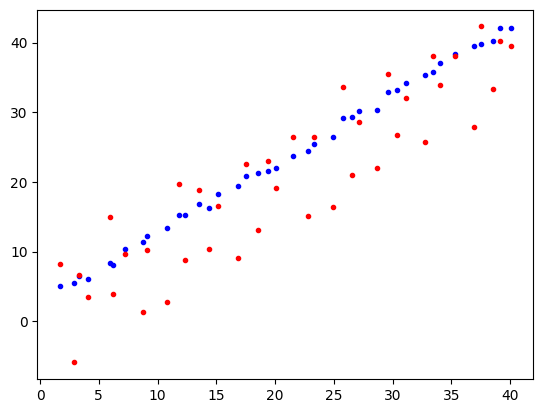

In [29]:
plt.plot(df['Dado Real'], df['Modelo 1'], '.b')
plt.plot(df['Dado Real'], df['Modelo 2'], '.r')
plt.show()

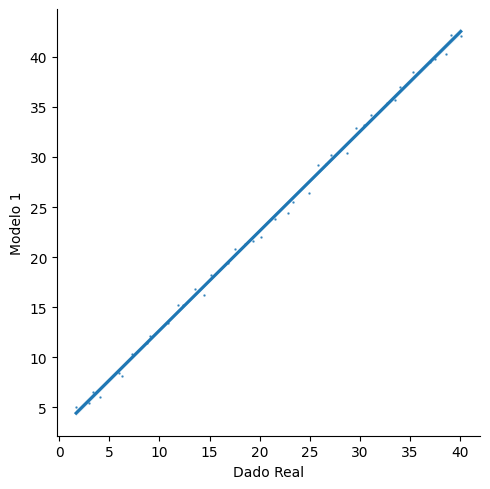

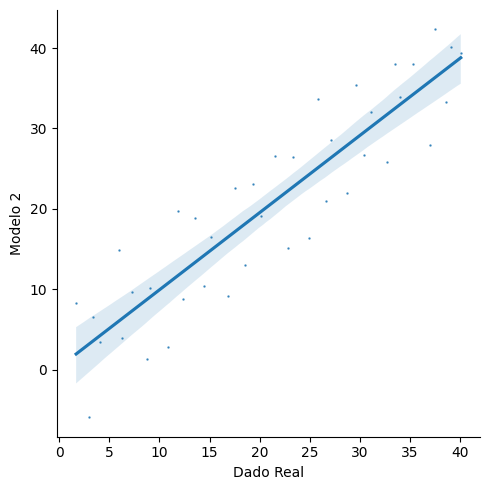

In [40]:
import seaborn as sns
%matplotlib inline
sns.lmplot(df, x='Dado Real', y='Modelo 1',scatter_kws={'s':0.5})
sns.lmplot(df, x='Dado Real', y='Modelo 2',scatter_kws={'s':0.5})